<a href="https://colab.research.google.com/github/slothfulz/Pair-Trading-Backtester/blob/main/Backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf

In [ ]:
tickers = ['DGX', 'NXPI']

In [ ]:
df = yf.download(tickers, start = '2024-01-01')

/tmp/ipython-input-2866751577.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2024-01-01')
[*********************100%***********************]  2 of 2 completed


In [ ]:
rolling_window = 252 #number of trading days

In [ ]:
stock1, stock2= tickers

In [ ]:
rolling_alpha = [np.nan] * rolling_window
rolling_beta = [np.nan] * rolling_window

In [ ]:
for i in range(rolling_window, len(df)):
  past_data = df.iloc[i-rolling_window: i]

  X= past_data[('Close', stock1)].values
  y= past_data[('Close', stock2)].values
  X= sm.add_constant(X)

  model = sm.OLS(y,X).fit()
  rolling_alpha.append(model.params[0])
  rolling_beta.append(model.params[1])

In [ ]:
rolling_params = pd.DataFrame({
    'Alpha': rolling_alpha,
    'Beta': rolling_beta }, index = df.index
)

In [ ]:
spread = df[('Close', stock2)] - (rolling_params['Alpha'] + rolling_params['Beta'] * df[('Close', stock1)])
spread

,0
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-08,NaN
...,...
2026-01-05,13.872995
2026-01-06,32.687559
2026-01-07,26.968774


In [ ]:
rolling_mean = spread.rolling(252).mean()
rolling_std = spread.rolling(252).std()
z_score = (spread - rolling_mean) / rolling_std

In [ ]:
spread_data = pd. DataFrame ({'spread': spread, 'rolling mean': rolling_mean, 'rolling std': rolling_std, 'z-score': z_score}, index = df.index)

<Axes: xlabel='Date'>

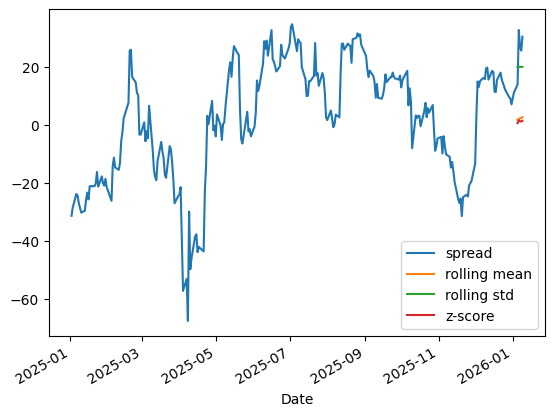

In [ ]:
spread_data.plot()